# a

## i)

In [2]:
import pandas as pd
import numpy as np

train = pd.read_csv('Letters_train.csv')
test = pd.read_csv('Letters_test.csv')

train['isB'] = train.apply(lambda x: "Yes" if x.letter == "B" else "No",axis = 1)
test['isB'] = test.apply(lambda x: "Yes" if x.letter == "B" else "No",axis = 1)

train['isB'].value_counts()

No     1652
Yes     529
Name: isB, dtype: int64

Not B is the majority class

In [3]:
default_isB = np.sum(test['isB'] == 'Yes')
default_notB = np.sum(test['isB'] == 'No')
print(pd.Series({'1': default_isB, '0': default_notB}))

ACC = default_notB/(default_notB + default_isB)
ACC

1    237
0    698
dtype: int64


0.746524064171123

The accuracy of this baseline method on the test set is 0.746524064171123

## ii)

In [4]:
from sklearn.linear_model import LogisticRegression

cols = ['xbox','ybox','width','height','onpix','xbar','ybar','x2bar','y2bar','xybar','x2ybar','xy2bar','xedge','xedgeycor','yedge','yedgexcor']
x_train_log = train[cols]
y_train_log = train['isB']

logreg = LogisticRegression(random_state = 88,max_iter=1000)
logreg.fit(x_train_log,y_train_log)

x_test_log = test[cols]
y_test_log = test['isB']

y_prob = logreg.predict_proba(x_test_log)
y_pred_log = pd.Series(["Yes" if x > 0.5 else "No" for x in y_prob[:,1]], index=y_test_log.index)

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test_log, y_pred_log)
print ("Confusion Matrix: \n", cm)
print ("\nAccuracy:", accuracy_score(y_test_log, y_pred_log))

Confusion Matrix: 
 [[666  32]
 [ 24 213]]

Accuracy: 0.9401069518716577


The accuracy of the logistic regression model on the test set, using a threshold of p=0.5 is 0.9401069518716577

## iii)

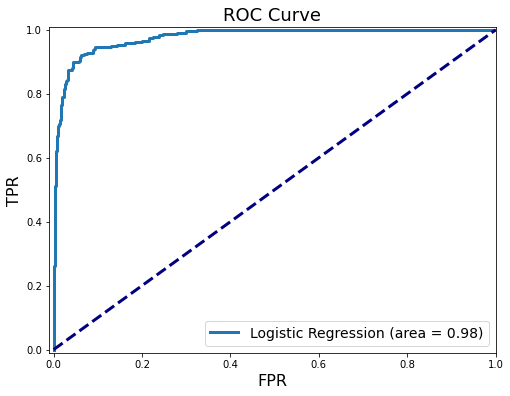

In [5]:
y_test_log1 = pd.Series([1 if x == 'Yes' else 0 for x in y_test_log],index = y_test_log.index)

import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

fpr, tpr, _ = roc_curve(y_test_log1, y_prob[:,1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.title('ROC Curve', fontsize=18)
plt.xlabel('FPR', fontsize=16)
plt.ylabel('TPR', fontsize=16)
plt.xlim([-0.01, 1.00])
plt.ylim([-0.01, 1.01])
plt.plot(fpr, tpr, lw=3, label='Logistic Regression (area = {:0.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=3, linestyle='--')
plt.legend(loc='lower right', fontsize=14)
plt.show()

The AUC of the logistic regression model is 0.98

## iv)

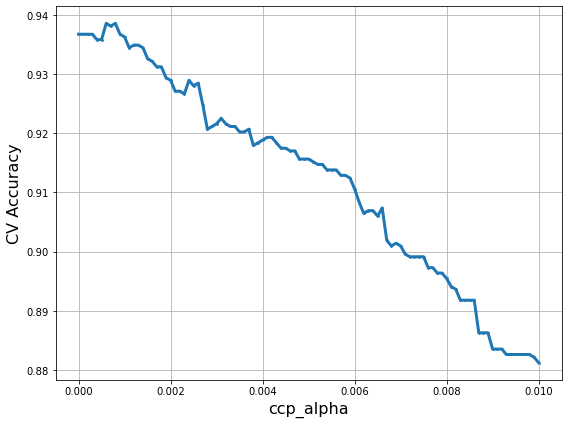

Best ccp_alpha {'ccp_alpha': 0.0008}


In [6]:
x_train_cart = train[cols]
y_train_cart = train['isB']
x_test_cart = test[cols]
y_test_cart = test['isB']

from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

grid_values = {'ccp_alpha': np.linspace(0, 0.01, 101)}

dtc = DecisionTreeClassifier(random_state=88)
dtc_cv = GridSearchCV(dtc, param_grid=grid_values, cv=10).fit(x_train_cart, y_train_cart)

ccp_alpha = dtc_cv.cv_results_['param_ccp_alpha'].data
ACC_scores = dtc_cv.cv_results_['mean_test_score']

plt.figure(figsize=(8, 6))
plt.xlabel('ccp_alpha', fontsize=16)
plt.ylabel('CV Accuracy', fontsize=16)
plt.scatter(ccp_alpha, ACC_scores, s=3)
plt.plot(ccp_alpha, ACC_scores, linewidth=3)
plt.grid(True, which='both')

plt.tight_layout()
plt.show()

print('Best ccp_alpha', dtc_cv.best_params_)

The ccp_alpha value selected for this tree through cross-validation is 0.0008. 
The aim of the cross-validation is to choose a nice ccp_alpha based on each corresponding accuracy. We use np.linspace(0, 0.01, 101) to provide 101 different ccp_apha value between 0 and 0.01, then by using GridSearchCV, we are able to conduct the CV for this CART model. And it returns the accuracy along with each ccp_alpha and we can visualize it using matplotlib. And then we choose the best ccp_alpha by dtc_cv.best_params_ having the best accuracy.

In [7]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

y_pred_cart = dtc_cv.predict(x_test_cart)
cm = confusion_matrix(y_test_cart, y_pred_cart)
print ("Confusion Matrix: \n", cm)
print ("\nAccuracy:", accuracy_score(y_test_cart, y_pred_cart))

Confusion Matrix: 
 [[666  32]
 [ 29 208]]

Accuracy: 0.9347593582887701


The accuracy of this CART model on the test set is 0.9347593582887701

## v)

In [8]:
x_train_rf = train[cols]
y_train_rf = train['isB']
x_test_rf = test[cols]
y_test_rf = test['isB']

from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(x_train_rf, y_train_rf)

y_pred_rf = rf.predict(x_test_rf)
cm = confusion_matrix(y_test_rf, y_pred_rf)
print ("Confusion Matrix: \n", cm)
print ("\nAccuracy:", accuracy_score(y_test_rf, y_pred_rf))

Confusion Matrix: 
 [[688  10]
 [ 11 226]]

Accuracy: 0.9775401069518717


The accuracy of this Random Forest model on the test set is 0.9871657754010695

## vi)

The accuracy of logistic regression model is 0.9401069518716577  
The accuracy of CART model is 0.9347593582887701  
The accuracy of Random Forest model is 0.9871657754010695  
Based on the accuracy performance, the Random Forest model performs best on the test set. For this application, I think the accuracy is more important because the variables themselves cannot explain why the probability of B increases when its value grows.

# b

## i)

In [9]:
train['letter'].value_counts()

P    578
A    562
B    529
R    512
Name: letter, dtype: int64

The majority class is P because it has the largest number

In [10]:
test['letter'].value_counts()

R    246
B    237
A    227
P    225
Name: letter, dtype: int64

In [11]:
ACC = 225/(246+237+227+225)
ACC

0.24064171122994651

The baseline accuracy on the test set is 0.24064171122994651

## ii)

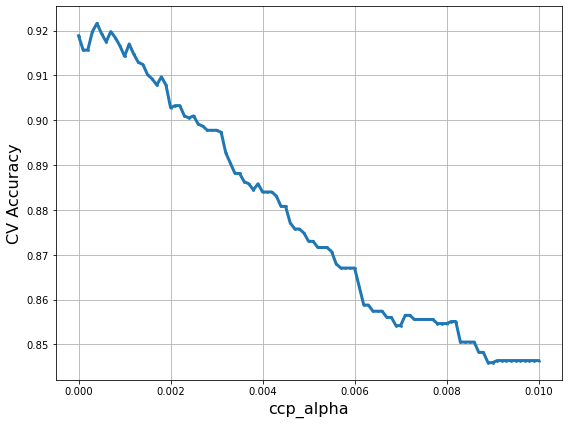

Best ccp_alpha {'ccp_alpha': 0.0004}


In [12]:
x_train_cart2 = train[cols]
y_train_cart2 = train['letter']
x_test_cart2 = test[cols]
y_test_cart2 = test['letter']

from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

grid_values = {'ccp_alpha': np.linspace(0, 0.01, 101)}

dtc = DecisionTreeClassifier()
dtc_cv = GridSearchCV(dtc, param_grid=grid_values,scoring='accuracy',cv=5,verbose=0).fit(x_train_cart2, y_train_cart2)

ccp_alpha = dtc_cv.cv_results_['param_ccp_alpha'].data
ACC_scores = dtc_cv.cv_results_['mean_test_score']

plt.figure(figsize=(8, 6))
plt.xlabel('ccp_alpha', fontsize=16)
plt.ylabel('CV Accuracy', fontsize=16)
plt.scatter(ccp_alpha, ACC_scores, s=3)
plt.plot(ccp_alpha, ACC_scores, linewidth=3)
plt.grid(True, which='both')

plt.tight_layout()
plt.show()

print('Best ccp_alpha', dtc_cv.best_params_)

The ccp_alpha value selected for this tree through cross-validation is 0.0009. 
The aim of the cross-validation is to choose a nice ccp_alpha based on each corresponding accuracy. We use np.linspace(0, 0.01, 101) to provide 101 different ccp_apha value between 0 and 0.01, then by using GridSearchCV, we are able to conduct the CV for this CART model. And it returns the accuracy along with each ccp_alpha and we can visualize it using matplotlib. And then we choose the best ccp_alpha by dtc_cv.best_params_ having the best accuracy.

In [13]:
y_pred_cart2 = dtc_cv.predict(x_test_cart2)
cm = confusion_matrix(y_test_cart2, y_pred_cart2)
print ("Confusion Matrix: \n", cm)
print ("\nAccuracy:", accuracy_score(y_test_cart2, y_pred_cart2))

Confusion Matrix: 
 [[221   4   0   2]
 [  1 209   5  22]
 [  0   8 216   1]
 [  3  28   4 211]]

Accuracy: 0.9165775401069519


The test set accuracy of the CART model is 0.9208556149732621

## iii)

In [14]:
x_train_rf2 = train[cols]
y_train_rf2 = train['letter']
x_test_rf2 = test[cols]
y_test_rf2 = test['letter']

p = len(cols)
rf2 = RandomForestClassifier(max_features=p, min_samples_leaf=5, n_estimators=500, random_state=88)
rf2.fit(x_train_rf2, y_train_rf2)

y_pred_rf2 = rf2.predict(x_test_rf2)
cm = confusion_matrix(y_test_rf2, y_pred_rf2)
print ("Confusion Matrix: \n", cm)
print ("\nAccuracy:", accuracy_score(y_test_rf2, y_pred_rf2))

Confusion Matrix: 
 [[220   2   1   4]
 [  1 224   4   8]
 [  0   4 221   0]
 [  2  20   1 223]]

Accuracy: 0.9497326203208556


The test set accuracy of the bagging model is 0.9497326203208556

## iv)

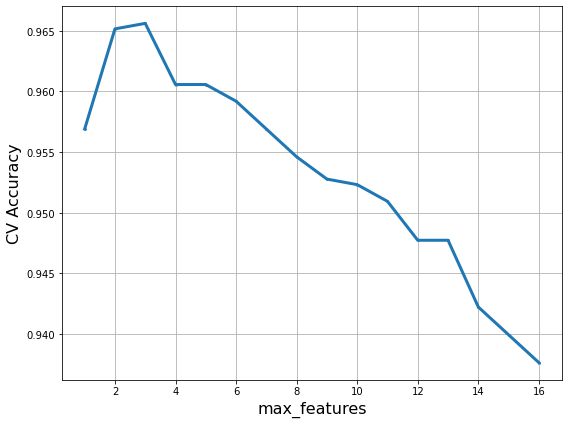

Best parameters {'max_features': 3, 'min_samples_leaf': 5, 'n_estimators': 500, 'random_state': 88}


In [15]:
grid_values = {'max_features': np.linspace(1,16,16, dtype='int32'),
               'min_samples_leaf': [5],
               'n_estimators': [500],
               'random_state': [88]} 

rf3 = RandomForestClassifier() 
rf_cv = GridSearchCV(rf3, param_grid=grid_values,scoring='accuracy', cv=5)
rf_cv.fit(x_train_rf2, y_train_rf2)

max_features = rf_cv.cv_results_['param_max_features'].data
ACC_scores = rf_cv.cv_results_['mean_test_score']

plt.figure(figsize=(8, 6))
plt.xlabel('max_features', fontsize=16)
plt.ylabel('CV Accuracy', fontsize=16)
plt.scatter(max_features, ACC_scores, s=3)
plt.plot(max_features, ACC_scores, linewidth=3)
plt.grid(True, which='both')

plt.tight_layout()
plt.show()

print('Best parameters', rf_cv.best_params_)

In [18]:
rf_cv.get_params()

{'cv': 5,
 'error_score': nan,
 'estimator__bootstrap': True,
 'estimator__ccp_alpha': 0.0,
 'estimator__class_weight': None,
 'estimator__criterion': 'gini',
 'estimator__max_depth': None,
 'estimator__max_features': 'auto',
 'estimator__max_leaf_nodes': None,
 'estimator__max_samples': None,
 'estimator__min_impurity_decrease': 0.0,
 'estimator__min_impurity_split': None,
 'estimator__min_samples_leaf': 1,
 'estimator__min_samples_split': 2,
 'estimator__min_weight_fraction_leaf': 0.0,
 'estimator__n_estimators': 100,
 'estimator__n_jobs': None,
 'estimator__oob_score': False,
 'estimator__random_state': None,
 'estimator__verbose': 0,
 'estimator__warm_start': False,
 'estimator': RandomForestClassifier(),
 'n_jobs': None,
 'param_grid': {'max_features': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16],
        dtype=int32),
  'min_samples_leaf': [5],
  'n_estimators': [500],
  'random_state': [88]},
 'pre_dispatch': '2*n_jobs',
 'refit': True,
 'return_train_s

The aim of this cross-validation is to figure out the best max_feature value based on the accuracy. By the use of GridSearchCV method and matplotlib visualization, we can see that when the max_feature is 3, we arrive at the highest accuracy. Based on the fact, we choose the max_feature value to be 3

In [25]:
y_pred_rf3 = rf_cv.predict(x_test_rf2)
cm = confusion_matrix(y_test_rf2, y_pred_rf3)
print ("Confusion Matrix: \n", cm)
print ("\nAccuracy:", accuracy_score(y_test_rf2, y_pred_rf3))

Confusion Matrix: 
 [[223   1   2   1]
 [  0 230   1   6]
 [  0   5 218   2]
 [  0  18   0 228]]

Accuracy: 0.9614973262032086


The test set accuracy for the Random Forest model is 0.9614973262032086

## v)

In [26]:
x_train_gbc = train[cols]
y_train_gbc = train['letter']
x_test_gbc = test[cols]
y_test_gbc = test['letter']

from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier(n_estimators=3300,max_leaf_nodes=10)
gbc.fit(x_train_gbc, y_train_gbc)

y_pred_gbc = gbc.predict(x_test_gbc)
cm = confusion_matrix(y_test_gbc, y_pred_gbc)
print ("Confusion Matrix: \n", cm)
print ("\nAccuracy:", accuracy_score(y_test_gbc, y_pred_gbc))

Confusion Matrix: 
 [[224   1   1   1]
 [  0 232   0   5]
 [  0   2 222   1]
 [  0  14   0 232]]

Accuracy: 0.9732620320855615


The test set accuracy of the gradient boosting model is 0.9700534759358289

# c

The test set accuracy of CART model is 0.9208556149732621  
The test set accuracy of bagging model is 0.9497326203208556  
The test set accuracy of Random Forest model is 0.9614973262032086  
The test set accuracy of the gradient boosting model is 0.9700534759358289

In [27]:
def accuracy(predictions,y_test,y_train):
    acc = accuracy_score(y_test, predictions)
    return acc

def bootstrap_validation(test_data, test_label, train_label, model, metrics_list, sample=500, random_state=66):
    n_sample = sample
    n_metrics = len(metrics_list)
    output_array=np.zeros([n_sample, n_metrics])
    output_array[:]=np.nan
    print(output_array.shape)
    for bs_iter in range(n_sample):
        bs_index = np.random.choice(test_data.index, len(test_data.index), replace=True)
        bs_data = test_data.loc[bs_index]
        bs_label = test_label.loc[bs_index]
        bs_predicted = model.predict(bs_data)
        for metrics_iter in range(n_metrics):
            metrics = metrics_list[metrics_iter]
            output_array[bs_iter, metrics_iter]=metrics(bs_predicted,bs_label,train_label)
    output_df = pd.DataFrame(output_array)
    return output_df

bs_output_cart = bootstrap_validation(x_test_cart2,y_test_cart2,y_train_cart2,dtc_cv,
                                 metrics_list=[accuracy],
                                 sample = 1000)

bs_output_bagging = bootstrap_validation(x_test_rf2,y_test_rf2,y_train_rf2,rf2,
                                 metrics_list=[accuracy],
                                 sample = 1000)

bs_output_rf = bootstrap_validation(x_test_rf2,y_test_rf2,y_train_rf2,rf_cv,
                                 metrics_list=[accuracy],
                                 sample = 1000)

bs_output_gbc = bootstrap_validation(x_test_gbc,y_test_gbc,y_train_gbc,gbc,
                                 metrics_list=[accuracy],
                                 sample = 1000)

(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)


In [28]:
bs_cart_acc_mean = bs_output_cart.mean()
bs_bagging_acc_mean = bs_output_bagging.mean()
bs_rf_acc_mean = bs_output_rf.mean()
bs_gbc_acc_mean = bs_output_gbc.mean()

print('The bootstrapped accuracy of CART model is '+str(float(bs_cart_acc_mean)))
print('The bootstrapped accuracy of bagging model is '+str(float(bs_bagging_acc_mean)))
print('The bootstrapped accuracy of Random Forest model is '+str(float(bs_rf_acc_mean)))
print('The bootstrapped accuracy of boosting model is '+str(float(bs_gbc_acc_mean)))

The bootstrapped accuracy of CART model is 0.9205229946523922
The bootstrapped accuracy of bagging model is 0.949731550802155
The bootstrapped accuracy of Random Forest model is 0.9616962566845051
The bootstrapped accuracy of boosting model is 0.9733112299465391


I would recommend the boosting model for this problem because it has the highest accuracy

(-0.05, 0.05)

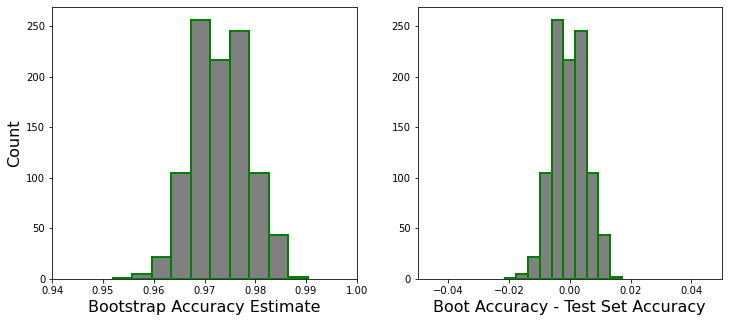

In [29]:
test_acc = accuracy(y_pred_gbc,y_test_gbc,y_train_gbc)

fig, axs = plt.subplots(ncols=2, figsize=(12,5))
axs[0].set_xlabel('Bootstrap Accuracy Estimate', fontsize=16)
axs[1].set_xlabel('Boot Accuracy - Test Set Accuracy', fontsize=16)
axs[0].set_ylabel('Count', fontsize=16)
axs[0].hist(bs_output_gbc.iloc[:,0], bins=10,edgecolor='green', linewidth=2,color = "grey")
axs[0].set_xlim([0.94,1.0])
axs[1].hist(bs_output_gbc.iloc[:,0]-test_acc, bins=10,edgecolor='green', linewidth=2,color = "grey")
axs[1].set_xlim([-0.05,0.05])

In [32]:
CI= np.quantile(bs_output_gbc.iloc[:,0],np.array([0.025,0.975]))
print("The 95-percent confidence interval of Accuracy is %s" % CI)

The 95-percent confidence interval of Accuracy is [0.96256684 0.98395722]


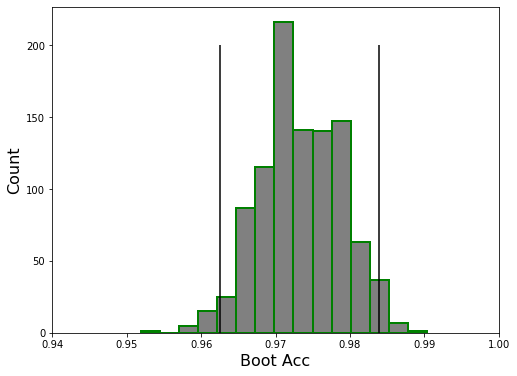

In [37]:
fig, axs = plt.subplots(ncols=1, figsize=(8,6))
axs.set_xlabel('Boot Acc', fontsize=16)
axs.set_ylabel('Count', fontsize=16)
axs.hist(bs_output_gbc.iloc[:,0], bins=15,edgecolor='green', linewidth=2,color = "grey")
axs.set_xlim([0.94,1])
axs.vlines(x=CI[0], ymin = 0, ymax =200, color = "black")
axs.vlines(x=CI[1], ymin = 0, ymax =200, color = "black")